# **FAT Lab**
### **Name -** Yash Vardhan Sharma
### **Reg. No. -** 19BCE1097
### **Professor -** Dr. L Jeganathan

## **Code of Academic Integrity**
I affirm that
* This work is my own original work and is not a borrowed work,
either from other students or from assignments for other courses.
* I have not given or received any unauthorized help on this assignment.
* This submission is free from
<ul>
  <li>Plagiarism</li>
  <li>Fabrication of facts</li>
  <li>Unauthorized assistance</li>
  <li>Collusion</li>
</ul>
* This submission gives proper credit to sources and references,
acknowledges the contributions and ideas of others relevant to
this academic work.
* This submission was prepared by me fully adhering to the rules
that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in
any other behavior that subverts the purpose of the assignment
and the directions of the teacher.

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import NearestCentroid

In [ ]:
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [ ]:
#Import for decision tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## Custom Functions

In [ ]:
def Supreme(X, Y, df, t_size =0.25,MLP_acti='relu' ,r_state=5, isLinearRegression=False, isSVM=False, isLogisticRegression=False, isGradientDescent=False, isDecisionTree=False, isRandomForest=False, isMultiLayerPerception=False, isKmeans = False, isAgglo = False, isRegression=False, isClassification=False, isClustering =False, isPlot = False, n_x = 'x', n_y = 'y', n_model='poly', n_degree =2, grad_iter = 2000, k =3, g_title='Title', g_xlabel='x-label', g_ylabel='y-label', error = 1):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t_size, random_state = r_state)
  if(isLinearRegression):
    model = LinearRegression()
  if(isSVM):
    model = svm.SVC(kernel = n_model, degree= n_degree)
  if(isLogisticRegression):
    model = LogisticRegression(C = 10, max_iter=100, solver='liblinear',tol=0.001,random_state=0)
  if(isDecisionTree):
    model = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9)
  if(isRandomForest):
    model = RandomForestClassifier(n_estimators=100,bootstrap=False)
  if(isMultiLayerPerception):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation=MLP_acti, solver='sgd', max_iter=1000)
  if(isGradientDescent):
    scaler = MinMaxScaler(feature_range=(0,1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = SGDRegressor(max_iter= grad_iter, eta0=0.1,tol=0.001)
  if(isKmeans):
    model = KMeans(n_clusters = k, init = 'k-means++', max_iter= 300, n_init=10,random_state=0)
    model.fit(X)
    y_clusters = model.predict(X)
  if(isAgglo):
    model = hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage ='ward')
    model.fit(X)
    y_clusters = model.fit_predict(X)
  if(isClustering):
    print("Clustering: ",y_clusters)
    silhouette_avg = silhouette_score(X, y_clusters)
    print("Silhoutte Score: ", silhouette_avg)
    if(isPlot):
      x_array = np.array(X)
      plt.style.use("ggplot")
      plt.figure(figsize=(15,8))
      plt.title(g_title)
      plt.xlabel(g_xlabel)
      plt.ylabel(g_ylabel)
      for i in range(0, k):
        sns.scatterplot( x = x_array[y_clusters == i,0], y = x_array[y_clusters == i,1], label = "Cluster"+str(i+1) , s = 70)
      if(isKmeans):
        sns.scatterplot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=70)
      if(isAgglo):
        clf = NearestCentroid()
        clf.fit(X, y_clusters)
        print(clf.centroids_)
        sns.scatterplot(clf.centroids_[:,0],clf.centroids_[:,1],marker='x',color='black',label='Centroid',s=70)
      plt.show()
    return(model, y_clusters)
  model.fit(X_train, Y_train)
  Y_Pred = model.predict(X_test)
  Y_Pred_train = model.predict(X_train)
  if(isClassification):
    print("Model Score: ",model.score(X_test, Y_test))
    sns.heatmap(confusion_matrix(Y_test, Y_Pred), annot = True, fmt='0.0f')
    print("Accuracy: ",accuracy_score(Y_test, Y_Pred))
    report = classification_report(Y_Pred, Y_test)
    print(report)
  if(isRegression):
    rmse_mlreg = np.sqrt(mean_squared_error(Y_Pred, Y_test)**2)
    print("Root mean squared error is: ", rmse_mlreg)
    r2_score_mlreg_train = r2_score(Y_Pred_train, Y_train)
    r2_score_mlreg_val = r2_score(Y_Pred, Y_test)
    print('r2_ score for train dataset : ', r2_score_mlreg_train)
    print('r2_ score for test dataset : ', r2_score_mlreg_val)
  if(isSVM):
    test_size = int(np.round(df.shape[0] *0.2,0)) + error
    if(isPlot):
      fig, ax = plt.subplots(figsize=(12, 7))# Removing to and right border
      ax.spines['top'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['right'].set_visible(False)# Create grid to evaluate model
      xx = np.linspace(-1, max(df[n_x]) + 1, len(X_train))
      yy = np.linspace(0, max(df[n_y]) + 1, len(Y_train))
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      train_size = len(df[:-test_size][n_x])# Assigning different colors to the classes
      colors = Y_train
      colors = np.where(colors == 1, '#8C7298', '#4786D1')# Plot the dataset
      ax.scatter(df[:-test_size][n_x], df[:-test_size][n_y], c=colors)#Get the separating hyperplane
      Z = model.decision_function(xy).reshape(XX.shape)
      # Draw the decision boundary and margins
      ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])# Highlight support vectors with a circle around them
      ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
      plt.show()
  if(isDecisionTree):
    if(isPlot):
      dot_data = StringIO()
      export_graphviz(model, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
      display(Image(graph.create_png()))
  if(isLinearRegression):
    print("Intercept: ", model.intercept_)
    print("Slope: ", model.coef_)
  return model

In [ ]:
def ElbowMethod(D, c_num):
  wcss = []
  for i in range(1, c_num):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter = 300, n_init= 10, random_state = 0)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
  print("Value of wcss: ", wcss)
  # Plot visualization b/w WCSS and Number of CLusters(K)
  plt.plot(range(1,c_num), wcss)
  # to view the points clearly we add scatter plot in addition to line
  plt.scatter(range(1,c_num), wcss, c = 'black', marker='o')
  plt.xlabel("K - Number of Clusters")
  plt.ylabel("WCSS")
  plt.show()
  return wcss

In [ ]:
def heatplot(df):
  plt.figure(figsize=(12,8))
  sns.heatmap(df.corr(), annot = True, cmap ='RdPu')
  plt.show()

In [ ]:
def generate_random_dataset(size):
  """ Generate a random dataset and that follows a quadratic distribution
  """
  x = []
  y = []
  target = []
  for i in range(size):
  # class zero
    x.append(np.round(random.uniform(0, 2.5), 1))
    y.append(np.round(random.uniform(0, 20), 1))
    target.append(0) # class one
    x.append(np.round(random.uniform(1, 5), 2))
    y.append(np.round(random.uniform(20, 25), 2))
    target.append(1)
    x.append(np.round(random.uniform(3, 5), 2))
    y.append(np.round(random.uniform(5, 25), 2))
    target.append(1)
  df_x = pd.DataFrame(data=x)
  df_y = pd.DataFrame(data=y)
  df_target = pd.DataFrame(data=target)
  data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
  data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
  data_frame.columns = ['x', 'y', 'target']
  return data_frame

In [ ]:
def meanchange(df, name):
  mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  df[name] = mean_imputer.fit_transform(df[name].values.reshape(-1,1))[:,0]
  return df
def modechange(df, name):
  mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  df[name] = mode_imputer.fit_transform(df[name].values.reshape(-1,1))[:,0]
  return df

In [ ]:
def remove_outlier(df, cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    iqr = Q3-Q1
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    df[cname]=np.where(
        df[cname]>upper_limit,
        upper_limit,
        np.where(
            df[cname]<lower_limit,
            lower_limit,
            df[cname]
        )
    )
    print(df[cname].skew())
    return df

In [ ]:
def LEncoder(df, cname):
  le_encoder = LabelEncoder()
  le_encoder.fit(df[cname].drop_duplicates())
  df[cname] = le_encoder.transform(df[cname])
  return df

## Pulling the Dataset

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/FAT_BCE1097.xlsx", na_values=[" ","?","??","???","-"])

(a)

In [ ]:
df.ndim

2

In [ ]:
df.shape

(1000, 10)

In [ ]:
df.head(15)

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Target
0,1050025.80,3932.73,0.37362,NaN,1.458263e+06,149.9560,4083.64,63,33.3465,17.702
1,10788.40,4253.25,0.39424,93.2289,1.493746e+06,150.8180,3929.65,59,31.3213,14.921
2,7852.36,2801.18,0.35673,83.8700,1.051329e+06,111.6930,3259.04,82,38.2204,9.495
3,6005.91,1236.67,0.20590,55.8064,8.171214e+05,68.2450,2343.07,27,42.0071,14.686
4,9797.55,2419.16,0.24691,142.1030,1.382717e+06,156.0510,4153.45,116,32.4552,2.527
5,8268.31,2870.20,0.34713,79.4282,1.118743e+06,112.5810,3239.92,122,35.1525,5.141
6,7915.09,3382.90,0.42739,82.9187,1.106852e+06,128.0190,4136.68,54,32.1113,17.124
7,5823.65,1557.51,0.26744,63.7928,7.866245e+05,89.2701,3340.40,50,37.6465,9.211
8,7226.15,1888.47,0.26133,64.5867,1.007930e+06,86.8005,3174.90,101,37.8481,1.818
9,11151.10,4505.34,0.40402,85.2480,1.584045e+06,173.7000,3912.45,8,33.8317,16.344


(b)

In [ ]:
df.isna().sum()

J1        0
J2        0
J3        0
J4        1
J5        0
J6        0
J7        1
J8        0
J9        0
Target    0
dtype: int64

(c) Identify the attributes which follow normal distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0a4412510>,
      dtype=object)

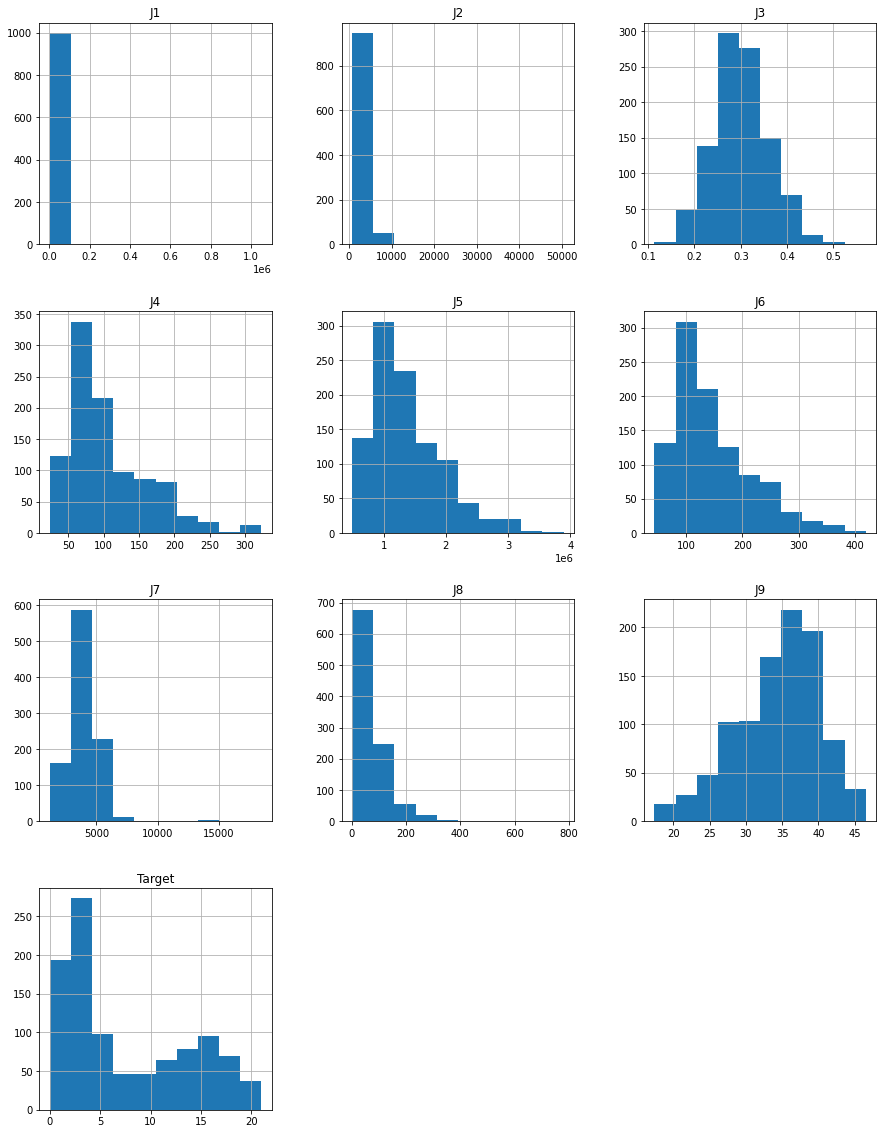

In [ ]:
df.hist(figsize=(15,20))

Inference: 'J3','J4','J5','J6','J7','J9' are normal distribution.

(d) Do the imputation by replacing all the NaN values in an attribute with the mean of all the values of that attribute or mode of all the values of that attribute. After executing the imputation, confirm that the imputation gets reflected in the dataset with appropriate outputs.

In [ ]:
from sklearn.impute import SimpleImputer
names = ['J4','J7']
for x in range(0, len(names)):
  D = meanchange(df, names[x])
D.isna().sum()

J1        0
J2        0
J3        0
J4        0
J5        0
J6        0
J7        0
J8        0
J9        0
Target    0
dtype: int64

In [ ]:
D.head()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Target
0,1050025.80,3932.73,0.37362,104.503598,1.458263e+06,149.956,4083.64,63,33.3465,17.702
1,10788.40,4253.25,0.39424,93.228900,1.493746e+06,150.818,3929.65,59,31.3213,14.921
2,7852.36,2801.18,0.35673,83.870000,1.051329e+06,111.693,3259.04,82,38.2204,9.495
3,6005.91,1236.67,0.20590,55.806400,8.171214e+05,68.245,2343.07,27,42.0071,14.686
4,9797.55,2419.16,0.24691,142.103000,1.382717e+06,156.051,4153.45,116,32.4552,2.527


(e) Identify the outliers in each of the attribute and replace the outliers using the ‘capping process’.

In [ ]:
names = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9','Target']
for columns in names:
  D = remove_outlier(D, columns)

0.8331919227872293
0.8523310643945047
0.15135883684221177
0.9555689460825265
0.8151611097946434
0.8672905792622043
0.2845443659386604
0.9444055602104215
-0.5519758763804983
0.6074322688619368


(f)  Caluclate the Maximum and Minimum value for each of attributes of D

In [ ]:
for columns in names:
  print("For ",columns)
  print("Maximum value is: ", max(D[columns]))
  print("Minimum value is: ", min(D[columns]))

For  J1
Maximum value is:  19732.949999999997
Minimum value is:  3578.72
For  J2
Maximum value is:  6475.2525000000005
Minimum value is:  740.9
For  J3
Maximum value is:  0.4526675000000001
Minimum value is:  0.1495874999999999
For  J4
Maximum value is:  240.4098
Minimum value is:  23.8196
For  J5
Maximum value is:  2736160.8314125
Minimum value is:  491961.0009
For  J6
Maximum value is:  311.89175
Minimum value is:  43.4804
For  J7
Maximum value is:  6817.596250000001
Minimum value is:  1196.94
For  J8
Maximum value is:  179.5
Minimum value is:  2.0
For  J9
Maximum value is:  46.5464
Minimum value is:  17.737912499999997
For  Target
Maximum value is:  20.997
Minimum value is:  0.0


In [ ]:
#aAlternative to see all the statistical values.
D.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9870.623210,2992.909077,0.301240,103.480952,1.364685e+06,145.201021,3914.991770,68.234000,34.420005,7.630794
std,3826.337628,1351.019193,0.059183,52.655545,5.286631e+05,66.080066,1064.636117,46.642623,5.843800,6.129825
min,3578.720000,740.900000,0.149587,23.819600,4.919610e+05,43.480400,1196.940000,2.000000,17.737912,0.000000
25%,7105.700000,1989.702500,0.263242,64.204300,9.678415e+05,95.925500,3200.177500,32.000000,30.285675,2.300000
50%,8926.215000,2672.030000,0.297110,88.156100,1.235124e+06,127.348500,3820.890000,58.000000,35.370300,4.669000
75%,12156.600000,3783.922500,0.339013,134.686500,1.675169e+06,182.312000,4647.145000,91.000000,38.650850,13.412000
max,19732.950000,6475.252500,0.452668,240.409800,2.736161e+06,311.891750,6817.596250,179.500000,46.546400,20.997000


(g)

In [ ]:
D_test_data = D.drop(['Target'], axis = 1)
D_test_data

,J1,J2,J3,J4,J5,J6,J7,J8,J9
0,19732.95,3932.73,0.37362,104.503598,1.458263e+06,149.9560,4083.64000,63.0,33.3465
1,10788.40,4253.25,0.39424,93.228900,1.493746e+06,150.8180,3929.65000,59.0,31.3213
2,7852.36,2801.18,0.35673,83.870000,1.051329e+06,111.6930,3259.04000,82.0,38.2204
3,6005.91,1236.67,0.20590,55.806400,8.171214e+05,68.2450,2343.07000,27.0,42.0071
4,9797.55,2419.16,0.24691,142.103000,1.382717e+06,156.0510,4153.45000,116.0,32.4552
...,...,...,...,...,...,...,...,...,...
995,12049.00,3545.42,0.29425,133.097000,1.674585e+06,158.3190,5152.46000,70.0,27.2676
996,8306.67,2900.88,0.34922,86.585400,1.107582e+06,123.8220,3285.22000,45.0,37.0239
997,3886.43,1246.46,0.32072,36.255600,5.253964e+05,48.8346,1376.87000,30.0,44.4725
998,11020.00,3871.94,0.35135,95.641000,1.510503e+06,130.7290,6817.59625,10.0,31.4343


In [ ]:
def gen_arr( min, max):
   arr = np.random.uniform(min, max, size=(15))
   return arr

In [ ]:
newarr =[]
for columns in names:
  newarr.append(gen_arr(max(D[columns]),min(D[columns])))

In [ ]:
newarr

[array([ 6910.02021693, 11238.84546308, 17433.59194961, 16849.39148844,
        18808.13282783,  4621.51898954, 13628.97095699, 16979.90261816,
        11709.9110249 , 13919.45979846, 11533.65228038, 12708.638134  ,
        19524.50869764, 19178.6411486 , 10120.43081646]),
 array([4066.14284291,  771.57327465, 5749.73821768, 2798.79304016,
        4380.3888777 , 4512.01537941, 4401.91340637, 5208.99903583,
        5981.59467317, 3204.79086754, 3069.015838  , 3895.1907522 ,
        2849.07928601, 2649.19535641, 4400.59853327]),
 array([0.15051408, 0.20965062, 0.43107335, 0.39220474, 0.16800766,
        0.18385338, 0.20512156, 0.32452892, 0.27987314, 0.31044242,
        0.28334541, 0.31419726, 0.28673346, 0.23838294, 0.33478934]),
 array([ 44.53414932, 221.14292421, 169.62226728,  30.24740467,
        210.03664918, 116.34691975, 204.06172768,  66.81952113,
        141.65207067,  30.74265759, 235.29506174,  98.41234596,
        219.10841583,  44.74550566, 138.86171728]),
 array([1340097.3

In [ ]:
data = {'J1': newarr[0],
        'J2': newarr[1],
        'J3': newarr[2],
        'J4': newarr[3],
        'J5': newarr[4],
        'J6': newarr[5],
        'J7': newarr[6],
        'J8': newarr[7],
        'J9': newarr[8],
        }
# Convert the dictionary into DataFrame
D_test_data = pd.DataFrame(data)

In [ ]:
D_test_data

,J1,J2,J3,J4,J5,J6,J7,J8,J9
0,6910.020217,4066.142843,0.150514,44.534149,1.340097e+06,195.915203,6427.120286,8.365555,36.738973
1,11238.845463,771.573275,0.209651,221.142924,2.004193e+06,227.829161,3427.273229,145.371227,32.446130
2,17433.591950,5749.738218,0.431073,169.622267,7.792603e+05,104.174030,3050.894526,106.158865,19.957218
3,16849.391488,2798.793040,0.392205,30.247405,2.664678e+06,196.393348,5636.566973,162.373622,27.870431
4,18808.132828,4380.388878,0.168008,210.036649,1.831439e+06,212.348232,5556.526192,65.864243,20.541668
5,4621.518990,4512.015379,0.183853,116.346920,2.520260e+06,300.983171,1670.038067,131.005461,31.332414
6,13628.970957,4401.913406,0.205122,204.061728,1.940766e+06,48.225771,4687.262934,12.735165,38.769201
7,16979.902618,5208.999036,0.324529,66.819521,1.744908e+06,283.538585,1992.712682,82.227060,19.793250
8,11709.911025,5981.594673,0.279873,141.652071,1.876779e+06,143.507523,5550.710876,56.701434,28.673745
9,13919.459798,3204.790868,0.310442,30.742658,9.133704e+05,142.801620,5390.525077,133.583883,26.576827


## 2. Training the models

### (a) With 75% of the dataset, Train a clustering model and concduct the following experiments

#### (i) Experiment 1 (E1)

In [ ]:
class sgd_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)
    xbShuffled, yShuffled = shuffle(X, y)
    for epoch in range(numEpochs):
      
      for i in range(num_of_samples):        
        X = xbShuffled[i:i+1]
        yi = yShuffled[i:i+1]
        
        delta = X.T.dot(X.dot(self.W)-yi.reshape(-1,1))
                
        self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
from sklearn.utils import shuffle
def StoicGradientfunc(D, col, target, pre_arr):
  X_traind, X_testd, y_traind, y_testd = train_test_split(np.asarray(D[col]),D[target], test_size=0.25, random_state=4)
  
  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)
  
  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  sgd = sgd_regressor(X_train_b)
  
  w = sgd.fit(X_train_b,Y_train)
  predicted_train =sgd.predict(X_train_b,w)
  rmse_train = sgd.measure(predicted_train,Y_train)
  predicted_test =sgd.predict(X_test_b,w)
  predict = sgd.predict(pre_arr, w)
  rmse_test = sgd.measure(predicted_test,y_testd)
  return(rmse_train, rmse_test, predict)

In [ ]:
col = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9']
kd, ld, E1 = StoicGradientfunc(D, col, 'Target' , D_test_data)
print('Training Mean Absolute Error', kd)
print('Test Mean Absolute Error', ld)
print('Performance', (ld+kd)/2)
print('Predicted value is: \n', E1)

Training Mean Absolute Error 5.15466025501809
Test Mean Absolute Error 5.386571248761474
Performance 5.270615751889782
Predicted value is: 
                0
0   3.539325e+07
1   5.290567e+07
2   2.063733e+07
3   7.036297e+07
4   4.839218e+07
5   6.650640e+07
6   5.125793e+07
7   4.610363e+07
8   4.957052e+07
9   2.415954e+07
10  6.996809e+07
11  1.596954e+07
12  5.622331e+07
13  1.669257e+07
14  6.832005e+07


#### (ii)  Experiment 2 (E2)

In [ ]:
class batch_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000):
    num_of_samples = len(X)    
    for epoch in range(numEpochs):      
      X, y = shuffle(X, y)
      delta = (X.T.dot(X.dot(self.W)-y.reshape(-1,1))/num_of_samples)        
      self.W = self.W - learning_rate * delta
      learning_rate = learning_rate/1.02
    
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
def batch_gradient(D, col, target, pre_arr):
  X_traind, X_testd, y_traind, y_testd = train_test_split(np.asarray(D[col]),D[target], test_size=0.25, random_state=4)
  
  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)
  
  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  bgd = batch_regressor(X_train_b)
  
  w = bgd.fit(X_train_b,Y_train)
  predicted_train =bgd.predict(X_train_b,w)
  rmse_train = bgd.measure(predicted_train,Y_train)
  predicted_test =bgd.predict(X_test_b,w)
  rmse_test = bgd.measure(predicted_test,y_testd)
  print('SDE train Error', rmse_train)
  print('SDE test Error', rmse_test)
  per = (rmse_train+rmse_test)/2
  print('Performane', per)
  print('Prediction: \n',bgd.predict(pre_arr,w))
  print('\n')
  return(bgd.predict(pre_arr,w))

In [ ]:
E2 = np.array(batch_gradient(D, col, 'Target' , D_test_data))

SDE train Error 5.983395866670362
SDE test Error 5.710824367556958
Performane 5.84711011711366
Prediction: 
                0
0   2.054833e+06
1   3.051134e+06
2   1.201988e+06
3   4.062084e+06
4   2.801557e+06
5   3.831908e+06
6   2.963391e+06
7   2.662289e+06
8   2.870095e+06
9   1.406632e+06
10  4.041430e+06
11  9.380152e+05
12  3.240811e+06
13  9.772150e+05
14  3.939756e+06




#### (iii)  Experiment 3 (E3)

In [ ]:
class mini_batch_regressor:

  def __init__(self,X):    
    self.W = np.random.randn(X.shape[1],1)    
    

  def fit(self,X, y, learning_rate=0.1, numEpochs=2000, batchsize=200):    
    num_of_samples = len(X)
    
    for epoch in range(numEpochs):
      xbShuffled, yShuffled = shuffle(X, y)
      for i in range(0,num_of_samples,batchsize):        
        X = xbShuffled[i:i+batchsize]
        y = yShuffled[i:i+batchsize]
        if len(X)<batchsize:
          break        
        delta = 1/batchsize*X.T.dot(X.dot(self.W)-y.reshape(-1,1))                        
              
        self.W = self.W - learning_rate * delta    
      learning_rate = learning_rate/1.02  
    return self.W
    
  def predict(self,X,W):
    return X.dot(W)

  def measure(self,y_predict,y_actual):
    return np.sqrt(mean_squared_error(y_predict, y_actual))

In [ ]:
def minibatch_gradient(D, col, target, pre_arr):
  X_traind, X_testd, y_traind, y_testd = train_test_split(np.asarray(D[col]),D[target], test_size=0.25, random_state=4)

  scaler = MinMaxScaler(feature_range=(0,1))
  X_train = scaler.fit_transform(X_traind)
  X_test = scaler.transform(X_testd)

  X_train_b = np.asarray(X_train)
  Y_train = np.asarray(y_traind)
  X_test_b = np.asarray(X_test)
  mgd = mini_batch_regressor(X_train_b)

  w = mgd.fit(X_train_b,Y_train)
  predicted_train =mgd.predict(X_train_b,w)
  rmse_train = mgd.measure(predicted_train,Y_train)
  predicted_test =mgd.predict(X_test_b,w)
  rmse_test = mgd.measure(predicted_test,y_testd)
  print('SDE train Error', rmse_train)
  print('SDE test Error', rmse_test)
  per = (rmse_train+rmse_test)/2
  print('Performane', per)
  print('Prediction: \n',mgd.predict(pre_arr,w))
  print('\n')
  return(mgd.predict(pre_arr,w))

In [ ]:
E3 = np.array(minibatch_gradient(D, col, 'Target' , D_test_data))

SDE train Error 7.933171865969908
SDE test Error 7.596355653041208
Performane 7.764763759505557
Prediction: 
                0
0   1.273210e+06
1   1.902943e+06
2   7.562342e+05
3   2.532349e+06
4   1.750667e+06
5   2.375214e+06
6   1.845409e+06
7   1.662983e+06
8   1.782489e+06
9   8.811335e+05
10  2.512542e+06
11  5.878019e+05
12  2.028507e+06
13  6.218009e+05
14  2.447976e+06




### (iV)Experiment 4 (E4): 

In [ ]:
D1 = D.copy()

In [ ]:
#df.loc[boolean_condition, column_name] = new_value
D1.loc[D.Target <= 0, 'Target'] = 'Label Z'
D1.loc[np.logical_and(D.Target > 0 , D.Target <= 10), 'Target'] = 'Label B'
D1.loc[np.logical_and(D.Target > 10 , D.Target <= 20), 'Target'] = 'Label C'
D1.loc[np.logical_and(D.Target > 20 , D.Target <= 30), 'Target'] = 'Label D'
D1.loc[D.Target > 30 , 'Target'] = 'Label E'

In [ ]:
D1

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Target
0,19732.95,3932.73,0.37362,104.503598,1.458263e+06,149.9560,4083.64000,63.0,33.3465,Label C
1,10788.40,4253.25,0.39424,93.228900,1.493746e+06,150.8180,3929.65000,59.0,31.3213,Label C
2,7852.36,2801.18,0.35673,83.870000,1.051329e+06,111.6930,3259.04000,82.0,38.2204,Label B
3,6005.91,1236.67,0.20590,55.806400,8.171214e+05,68.2450,2343.07000,27.0,42.0071,Label C
4,9797.55,2419.16,0.24691,142.103000,1.382717e+06,156.0510,4153.45000,116.0,32.4552,Label B
...,...,...,...,...,...,...,...,...,...,...
995,12049.00,3545.42,0.29425,133.097000,1.674585e+06,158.3190,5152.46000,70.0,27.2676,Label C
996,8306.67,2900.88,0.34922,86.585400,1.107582e+06,123.8220,3285.22000,45.0,37.0239,Label B
997,3886.43,1246.46,0.32072,36.255600,5.253964e+05,48.8346,1376.87000,30.0,44.4725,Label C
998,11020.00,3871.94,0.35135,95.641000,1.510503e+06,130.7290,6817.59625,10.0,31.4343,Label C


#### (vi) Experiment 5 (E5)

Inference: G1, G2, G4, G5 and G6 are normal distribution.

In [ ]:
D2 = D1.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
X = D2.drop(['J3','J4','J5','J6','J7','J9','Target'], axis =1)
normalizer = Normalizer().fit(X)
X = normalizer.transform(X)

In [ ]:
Y = D2[['J3','J4','J5','J6','J7','J9']]

In [ ]:
scaler = StandardScaler()
scaler.fit(Y)
Y = scaler.transform(Y)

In [ ]:
temp_X = pd.DataFrame(X, columns = ['J1','J2','J8'])

In [ ]:
temp_Y = pd.DataFrame(Y, columns = ['J3','J4','J5','J6','J7','J9'])

In [ ]:
temp = pd.concat([temp_X, temp_Y], axis=1, join='inner')

In [ ]:
temp['Target'] = D1['Target']

In [ ]:
D2 = temp.copy()

In [ ]:
D2

,J1,J2,J8,J3,J4,J5,J6,J7,J9,Target
0,0.980708,0.195453,0.003131,1.223613,0.019431,0.177098,0.071994,0.158489,-0.183792,Label C
1,0.930300,0.366764,0.005088,1.572201,-0.194798,0.244250,0.085045,0.013775,-0.530520,Label C
2,0.941819,0.335976,0.009835,0.938081,-0.372625,-0.593028,-0.507336,-0.616436,0.650655,Label B
3,0.979442,0.201676,0.004403,-1.611751,-0.905857,-1.036269,-1.165170,-1.477226,1.298965,Label C
4,0.970779,0.239700,0.011494,-0.918463,0.733852,0.034126,0.164277,0.224093,-0.336389,Label B
...,...,...,...,...,...,...,...,...,...,...
995,0.959316,0.282279,0.005573,-0.118164,0.562730,0.586490,0.198616,1.162921,-1.224543,Label C
996,0.944075,0.329693,0.005114,0.811122,-0.321030,-0.486569,-0.323694,-0.591833,0.445805,Label B
997,0.952199,0.305390,0.007350,0.329320,-1.277339,-1.588362,-1.459058,-2.385220,1.721059,Label C
998,0.943459,0.331490,0.000856,0.847131,-0.148966,0.275963,-0.219117,2.727746,-0.511174,Label C


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#D2 = LEncoder(D2, 'Target')
#D2

In [ ]:
D2.Target.unique()

array(['Label C', 'Label B', 'Label D', 'Label Z'], dtype=object)

In [ ]:
(unique, counts) = np.unique(D2['Target'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Label B' 643]
 ['Label C' 335]
 ['Label D' 17]
 ['Label Z' 5]]


In [ ]:
# Resample uses bootstrapping method to regenerate samples by randomly selecting data for each class.
from sklearn.utils import resample
df_0 = D2[D2['Target'] == 'Label B']
df_1 = D2[D2['Target'] == 'Label C']
df_2 = D2[D2['Target'] == 'Label D']
df_3 = D2[D2['Target'] == 'Label Z']

# Apply resample
df_1_upsample = resample(df_1, n_samples = 627, replace = True, random_state= 123)
df_2_upsample = resample(df_2, n_samples = 627, replace = True, random_state= 123)
df_3_upsample = resample(df_3, n_samples = 627, replace = True, random_state= 123)

D2 = pd.concat([df_0,df_1_upsample,df_2_upsample, df_3_upsample])

In [ ]:
D2

,J1,J2,J8,J3,J4,J5,J6,J7,J9,Target
2,0.941819,0.335976,0.009835,0.938081,-0.372625,-0.593028,-0.507336,-0.616436,0.650655,Label B
4,0.970779,0.239700,0.011494,-0.918463,0.733852,0.034126,0.164277,0.224093,-0.336389,Label B
5,0.944608,0.327904,0.013938,0.775790,-0.457023,-0.465447,-0.493891,-0.634404,0.125408,Label B
7,0.966014,0.258356,0.008294,-0.571397,-0.754109,-1.093985,-0.846835,-0.539977,0.552399,Label B
8,0.967418,0.252823,0.013522,-0.674688,-0.739024,-0.675162,-0.884226,-0.695507,0.586914,Label B
...,...,...,...,...,...,...,...,...,...,...
321,0.981181,0.193085,0.001649,-1.765928,1.178681,1.033773,1.039835,0.633790,-0.821076,Label Z
399,0.959374,0.281973,0.009617,-0.123912,-1.158905,-1.147123,-1.188105,-1.031922,1.084374,Label Z
399,0.959374,0.281973,0.009617,-0.123912,-1.158905,-1.147123,-1.188105,-1.031922,1.084374,Label Z
435,0.951022,0.309093,0.004383,0.401844,-0.761183,-0.502616,-0.366361,-0.314586,0.825492,Label Z


In [ ]:
(unique, counts) = np.unique(D2['Target'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Label B' 643]
 ['Label C' 627]
 ['Label D' 627]
 ['Label Z' 627]]


#### (F) Experiment 6 (E6)

In [ ]:
X = D2.drop(['Target'], axis =1)
Y = D2['Target']

Model Score:  0.5832012678288431
Accuracy:  0.5832012678288431
              precision    recall  f1-score   support

     Label B       0.37      0.64      0.47        95
     Label C       0.43      0.38      0.40       165
     Label D       0.74      0.64      0.68       193
     Label Z       0.79      0.68      0.73       178

    accuracy                           0.58       631
   macro avg       0.58      0.59      0.57       631
weighted avg       0.62      0.58      0.59       631



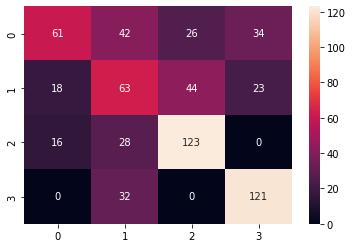

In [ ]:
logistic_model = Supreme(X, Y, D2, isLogisticRegression=True, isClassification=True)

In [ ]:
D_test_data_predicted = D_test_data.copy()

In [ ]:
D_test_data_predicted['LR']=logistic_model.predict(D_test_data)
print(D_test_data_predicted['LR'])

0     Label B
1     Label B
2     Label B
3     Label B
4     Label B
5     Label B
6     Label B
7     Label B
8     Label B
9     Label B
10    Label B
11    Label B
12    Label B
13    Label B
14    Label B
Name: LR, dtype: object


In [ ]:
D_test_data_predicted

,J1,J2,J3,J4,J5,J6,J7,J8,J9,LR
0,6910.020217,4066.142843,0.150514,44.534149,1.340097e+06,195.915203,6427.120286,8.365555,36.738973,Label B
1,11238.845463,771.573275,0.209651,221.142924,2.004193e+06,227.829161,3427.273229,145.371227,32.446130,Label B
2,17433.591950,5749.738218,0.431073,169.622267,7.792603e+05,104.174030,3050.894526,106.158865,19.957218,Label B
3,16849.391488,2798.793040,0.392205,30.247405,2.664678e+06,196.393348,5636.566973,162.373622,27.870431,Label B
4,18808.132828,4380.388878,0.168008,210.036649,1.831439e+06,212.348232,5556.526192,65.864243,20.541668,Label B
5,4621.518990,4512.015379,0.183853,116.346920,2.520260e+06,300.983171,1670.038067,131.005461,31.332414,Label B
6,13628.970957,4401.913406,0.205122,204.061728,1.940766e+06,48.225771,4687.262934,12.735165,38.769201,Label B
7,16979.902618,5208.999036,0.324529,66.819521,1.744908e+06,283.538585,1992.712682,82.227060,19.793250,Label B
8,11709.911025,5981.594673,0.279873,141.652071,1.876779e+06,143.507523,5550.710876,56.701434,28.673745,Label B
9,13919.459798,3204.790868,0.310442,30.742658,9.133704e+05,142.801620,5390.525077,133.583883,26.576827,Label B


#### (H) Experiment 8 (E8)

In [ ]:
X = D2.drop(['Target'], axis =1)
Y = D2['Target']

Model Score:  0.6957210776545166
Accuracy:  0.6957210776545166
              precision    recall  f1-score   support

     Label B       0.52      0.67      0.59       127
     Label C       0.43      0.54      0.48       118
     Label D       0.82      0.76      0.79       181
     Label Z       1.00      0.75      0.85       205

    accuracy                           0.70       631
   macro avg       0.69      0.68      0.68       631
weighted avg       0.75      0.70      0.71       631



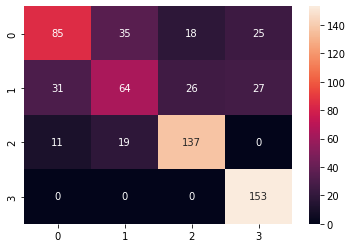

In [ ]:
SVM_model = Supreme(X, Y, D2, isSVM=True, isClassification=True)

In [ ]:
SVM_model.support_vectors_

array([[ 0.94181917,  0.33597607,  0.00983515, ..., -0.50733587,
        -0.61643597,  0.65065482],
       [ 0.93692767,  0.34941444,  0.00872311, ..., -0.78603127,
        -1.22480714,  1.20283215],
       [ 0.93620206,  0.35144195,  0.00377567, ..., -0.71971639,
        -0.63441354,  0.76079238],
       ...,
       [ 0.97551429,  0.21991346,  0.00315424, ..., -0.98834471,
        -0.6423357 ,  0.85026524],
       [ 0.97551429,  0.21991346,  0.00315424, ..., -0.98834471,
        -0.6423357 ,  0.85026524],
       [ 0.95102181,  0.30909272,  0.00438315, ..., -0.36636054,
        -0.31458568,  0.82549157]])

In [ ]:
D_test_data_predicted['SVM']=SVM_model.predict(D_test_data)
print(D_test_data_predicted['SVM'])

0     Label B
1     Label B
2     Label B
3     Label B
4     Label B
5     Label B
6     Label B
7     Label B
8     Label B
9     Label B
10    Label B
11    Label B
12    Label B
13    Label B
14    Label B
Name: SVM, dtype: object


In [ ]:
D_test_data_predicted

,J1,J2,J3,J4,J5,J6,J7,J8,J9,LR,SVM
0,6910.020217,4066.142843,0.150514,44.534149,1.340097e+06,195.915203,6427.120286,8.365555,36.738973,Label B,Label B
1,11238.845463,771.573275,0.209651,221.142924,2.004193e+06,227.829161,3427.273229,145.371227,32.446130,Label B,Label B
2,17433.591950,5749.738218,0.431073,169.622267,7.792603e+05,104.174030,3050.894526,106.158865,19.957218,Label B,Label B
3,16849.391488,2798.793040,0.392205,30.247405,2.664678e+06,196.393348,5636.566973,162.373622,27.870431,Label B,Label B
4,18808.132828,4380.388878,0.168008,210.036649,1.831439e+06,212.348232,5556.526192,65.864243,20.541668,Label B,Label B
5,4621.518990,4512.015379,0.183853,116.346920,2.520260e+06,300.983171,1670.038067,131.005461,31.332414,Label B,Label B
6,13628.970957,4401.913406,0.205122,204.061728,1.940766e+06,48.225771,4687.262934,12.735165,38.769201,Label B,Label B
7,16979.902618,5208.999036,0.324529,66.819521,1.744908e+06,283.538585,1992.712682,82.227060,19.793250,Label B,Label B
8,11709.911025,5981.594673,0.279873,141.652071,1.876779e+06,143.507523,5550.710876,56.701434,28.673745,Label B,Label B
9,13919.459798,3204.790868,0.310442,30.742658,9.133704e+05,142.801620,5390.525077,133.583883,26.576827,Label B,Label B


#### (J) Experiment 10 (E10)

In [ ]:
D3 = D2.drop(['Target'], axis =1)

Value of wcss:  [17823.522623935212, 8086.545264724147, 6520.5463897037325, 5313.921363854107, 4380.45034498073, 3660.312505021603, 3212.4793147050264, 2778.4907136264446, 2472.407843847744, 2165.321921979416, 1879.852388866488, 1728.809482898177, 1661.581972707123, 1524.6849989508419, 1456.9344262906043]


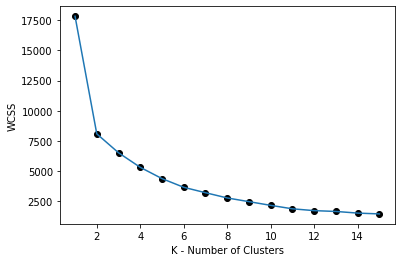

In [ ]:
wcss = ElbowMethod(D3, 16)

Taking the value of k as 3

Clustering:  [1 1 1 ... 1 1 1]
Silhoutte Score:  0.39058336642375796


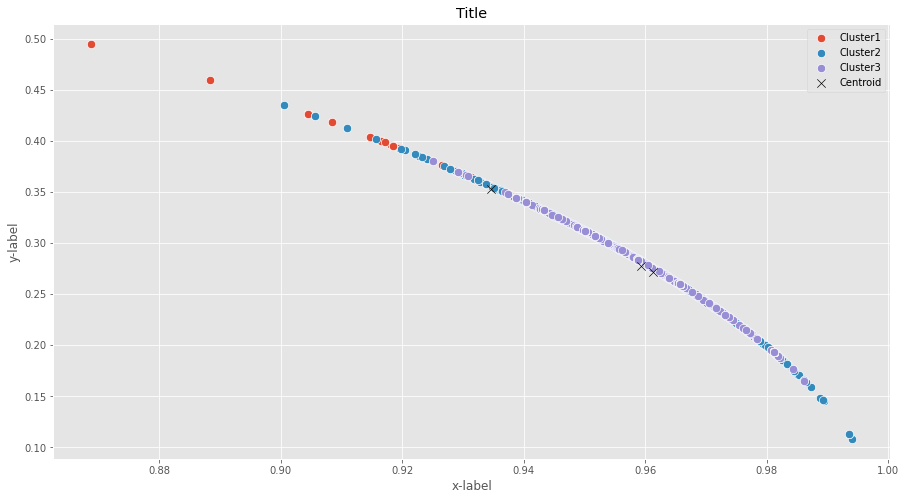

In [ ]:
Kmean_model, y_clusters = Supreme(X, Y, D3, isKmeans=True, isClustering=True, isPlot=True, k =3)

In [ ]:
Kmean_model.cluster_centers_

array([[ 0.93455907,  0.35278255,  0.00628753,  1.4085212 ,  0.02520529,
         0.73005177,  0.66970992,  0.89713871, -0.36549362],
       [ 0.96124128,  0.27126158,  0.00636446, -0.30739231, -0.61207906,
        -0.60295643, -0.65542994, -0.50097237,  0.76881828],
       [ 0.95923118,  0.27721802,  0.00649107, -0.09299753,  1.4986711 ,
         1.5861088 ,  1.49451107,  1.28074349, -1.37842858]])

## 3. Inference

###(i)
####A

In [ ]:
temp_D = D_test_data.copy()

In [ ]:
temp_D['E1'] = E1
temp_D['E2'] =E2
temp_D['E3'] =E3
temp_D['E4'] = D_test_data_predicted['LR']
temp_D['E9'] = D_test_data_predicted['SVM']

In [ ]:
temp_D

,J1,J2,J3,J4,J5,J6,J7,J8,J9,E1,E2,E3,E4,E9
0,6910.020217,4066.142843,0.150514,44.534149,1.340097e+06,195.915203,6427.120286,8.365555,36.738973,3.539325e+07,2.054833e+06,1.273210e+06,Label B,Label B
1,11238.845463,771.573275,0.209651,221.142924,2.004193e+06,227.829161,3427.273229,145.371227,32.446130,5.290567e+07,3.051134e+06,1.902943e+06,Label B,Label B
2,17433.591950,5749.738218,0.431073,169.622267,7.792603e+05,104.174030,3050.894526,106.158865,19.957218,2.063733e+07,1.201988e+06,7.562342e+05,Label B,Label B
3,16849.391488,2798.793040,0.392205,30.247405,2.664678e+06,196.393348,5636.566973,162.373622,27.870431,7.036297e+07,4.062084e+06,2.532349e+06,Label B,Label B
4,18808.132828,4380.388878,0.168008,210.036649,1.831439e+06,212.348232,5556.526192,65.864243,20.541668,4.839218e+07,2.801557e+06,1.750667e+06,Label B,Label B
5,4621.518990,4512.015379,0.183853,116.346920,2.520260e+06,300.983171,1670.038067,131.005461,31.332414,6.650640e+07,3.831908e+06,2.375214e+06,Label B,Label B
6,13628.970957,4401.913406,0.205122,204.061728,1.940766e+06,48.225771,4687.262934,12.735165,38.769201,5.125793e+07,2.963391e+06,1.845409e+06,Label B,Label B
7,16979.902618,5208.999036,0.324529,66.819521,1.744908e+06,283.538585,1992.712682,82.227060,19.793250,4.610363e+07,2.662289e+06,1.662983e+06,Label B,Label B
8,11709.911025,5981.594673,0.279873,141.652071,1.876779e+06,143.507523,5550.710876,56.701434,28.673745,4.957052e+07,2.870095e+06,1.782489e+06,Label B,Label B
9,13919.459798,3204.790868,0.310442,30.742658,9.133704e+05,142.801620,5390.525077,133.583883,26.576827,2.415954e+07,1.406632e+06,8.811335e+05,Label B,Label B


B.

In [ ]:
#df.loc[boolean_condition, column_name] = new_value
temp_D.loc[temp_D.E1 <= 0, 'E1'] = 'Label Z'
temp_D.loc[np.logical_and(temp_D.E1 > 0 , temp_D.E1 <= 10), 'E1'] = 'Label B'
temp_D.loc[np.logical_and(temp_D.E1 > 10 , temp_D.E1 <= 20), 'E1'] = 'Label C'
temp_D.loc[np.logical_and(temp_D.E1 > 20 , temp_D.E1 <= 30), 'E1'] = 'Label D'
temp_D.loc[temp_D.E1 > 30 , 'E1'] = 'Label E'

In [ ]:
#df.loc[boolean_condition, column_name] = new_value
temp_D.loc[temp_D.E2 <= 0, 'E2'] = 'Label Z'
temp_D.loc[np.logical_and(temp_D.E2 > 0 , temp_D.E2 <= 10), 'E2'] = 'Label B'
temp_D.loc[np.logical_and(temp_D.E2 > 10 , temp_D.E2 <= 20), 'E2'] = 'Label C'
temp_D.loc[np.logical_and(temp_D.E2 > 20 , temp_D.E2 <= 30), 'E2'] = 'Label D'
temp_D.loc[temp_D.E2 > 30 , 'E2'] = 'Label E'

In [ ]:
#df.loc[boolean_condition, column_name] = new_value
temp_D.loc[temp_D.E3 <= 0, 'E3'] = 'Label Z'
temp_D.loc[np.logical_and(temp_D.E3 > 0 , temp_D.E3 <= 10), 'E3'] = 'Label B'
temp_D.loc[np.logical_and(temp_D.E3 > 10 , temp_D.E3 <= 20), 'E3'] = 'Label C'
temp_D.loc[np.logical_and(temp_D.E3 > 20 , temp_D.E3 <= 30), 'E3'] = 'Label D'
temp_D.loc[temp_D.E3 > 30 , 'E3'] = 'Label E'

In [ ]:
temp_D

,J1,J2,J3,J4,J5,J6,J7,J8,J9,E1,E2,E3,E4,E9
0,6910.020217,4066.142843,0.150514,44.534149,1.340097e+06,195.915203,6427.120286,8.365555,36.738973,Label E,Label E,Label E,Label B,Label B
1,11238.845463,771.573275,0.209651,221.142924,2.004193e+06,227.829161,3427.273229,145.371227,32.446130,Label E,Label E,Label E,Label B,Label B
2,17433.591950,5749.738218,0.431073,169.622267,7.792603e+05,104.174030,3050.894526,106.158865,19.957218,Label E,Label E,Label E,Label B,Label B
3,16849.391488,2798.793040,0.392205,30.247405,2.664678e+06,196.393348,5636.566973,162.373622,27.870431,Label E,Label E,Label E,Label B,Label B
4,18808.132828,4380.388878,0.168008,210.036649,1.831439e+06,212.348232,5556.526192,65.864243,20.541668,Label E,Label E,Label E,Label B,Label B
5,4621.518990,4512.015379,0.183853,116.346920,2.520260e+06,300.983171,1670.038067,131.005461,31.332414,Label E,Label E,Label E,Label B,Label B
6,13628.970957,4401.913406,0.205122,204.061728,1.940766e+06,48.225771,4687.262934,12.735165,38.769201,Label E,Label E,Label E,Label B,Label B
7,16979.902618,5208.999036,0.324529,66.819521,1.744908e+06,283.538585,1992.712682,82.227060,19.793250,Label E,Label E,Label E,Label B,Label B
8,11709.911025,5981.594673,0.279873,141.652071,1.876779e+06,143.507523,5550.710876,56.701434,28.673745,Label E,Label E,Label E,Label B,Label B
9,13919.459798,3204.790868,0.310442,30.742658,9.133704e+05,142.801620,5390.525077,133.583883,26.576827,Label E,Label E,Label E,Label B,Label B


D

In [ ]:
import statistics
for index, row in temp_D.iterrows():
  temp_D['new-output'] = statistics.mode([row['E3']])

In [ ]:
temp_D

,J1,J2,J3,J4,J5,J6,J7,J8,J9,E1,E2,E3,E4,E9,new-output
0,6910.020217,4066.142843,0.150514,44.534149,1.340097e+06,195.915203,6427.120286,8.365555,36.738973,Label E,Label E,Label E,Label B,Label B,Label E
1,11238.845463,771.573275,0.209651,221.142924,2.004193e+06,227.829161,3427.273229,145.371227,32.446130,Label E,Label E,Label E,Label B,Label B,Label E
2,17433.591950,5749.738218,0.431073,169.622267,7.792603e+05,104.174030,3050.894526,106.158865,19.957218,Label E,Label E,Label E,Label B,Label B,Label E
3,16849.391488,2798.793040,0.392205,30.247405,2.664678e+06,196.393348,5636.566973,162.373622,27.870431,Label E,Label E,Label E,Label B,Label B,Label E
4,18808.132828,4380.388878,0.168008,210.036649,1.831439e+06,212.348232,5556.526192,65.864243,20.541668,Label E,Label E,Label E,Label B,Label B,Label E
5,4621.518990,4512.015379,0.183853,116.346920,2.520260e+06,300.983171,1670.038067,131.005461,31.332414,Label E,Label E,Label E,Label B,Label B,Label E
6,13628.970957,4401.913406,0.205122,204.061728,1.940766e+06,48.225771,4687.262934,12.735165,38.769201,Label E,Label E,Label E,Label B,Label B,Label E
7,16979.902618,5208.999036,0.324529,66.819521,1.744908e+06,283.538585,1992.712682,82.227060,19.793250,Label E,Label E,Label E,Label B,Label B,Label E
8,11709.911025,5981.594673,0.279873,141.652071,1.876779e+06,143.507523,5550.710876,56.701434,28.673745,Label E,Label E,Label E,Label B,Label B,Label E
9,13919.459798,3204.790868,0.310442,30.742658,9.133704e+05,142.801620,5390.525077,133.583883,26.576827,Label E,Label E,Label E,Label B,Label B,Label E


                                                  Train data     Validation data
 - Experiment 1 (Regression in Stochastic mode) -      5.154,            5.38
 - Experiment 2 (Regression in Batch mode) -           5.98,             5.71
 - Experiment 3 (Regression in Mini-batch mode) -      7.93,             7.59
 - Experiment 6 (Logistic Regression)-                 0.58,        macro 0.57  
 - Experiment 8 (SVM)  -                               0.70,        macro 0.68
 - Experiment 10 (K-Means) -                            0.549 (sillhoute score)

### SVM has a better accuracy score as compared to Logistic Regression
### The highest value of performance is shown by Regression in Mini-batch mode followed by SVM then logistic Regression. Best model is stochastic mode because less the performance higher the accuracy.

In E5 is the best model with an accuracy score of 1 others accuracy can be inferered easily from above table.